In [2]:
# libraries
from pandas_datareader import data
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# configure
%matplotlib inline
sns.set(style = 'whitegrid')

In [4]:
# path
os.getcwd()

'C:\\Users\\Joseph\\Desktop\\AlphaLearn\\AlgoDev'

In [5]:
# import india rain data
india_rain = pd.read_csv('C:\\Users\\Joseph\\Desktop\\AlphaLearn\\Data\\rainfall-india.csv')

In [6]:
# summary
print(india_rain.head())
print(india_rain.info())
print(india_rain.columns)

   Rainfall - (MM)   Year  Month  Country  ISO3
0          11.8792   1991    Jan    India   IND
1          12.3276   1991    Feb    India   IND
2          13.4113   1991    Mar    India   IND
3          41.9814   1991    Apr    India   IND
4          55.3486   1991    May    India   IND
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
Rainfall - (MM)    312 non-null float64
 Year              312 non-null int64
 Month             312 non-null object
 Country           312 non-null object
 ISO3              312 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 12.3+ KB
None
Index(['Rainfall - (MM)', ' Year', ' Month', ' Country', ' ISO3'], dtype='object')


In [7]:
## data preprocessing

# get time
month = list(pd.Series(list(india_rain[' Month'])).apply(lambda t: t.split(' ')[1]))
year = [str(time) for time in list(india_rain[' Year'])]
zipped_dates = zip(month, year)

# combine and cast to datetime object
string_dates = [str(t[0]) + "-" + str(t[1]) for t in list(zipped_dates)]
obj_dates = pd.Series([datetime.strptime(sd, '%b-%Y') for sd in string_dates], name='Date')

# rename rainfall, create dataframe
df_india_rainfall = pd.DataFrame(india_rain['Rainfall - (MM)'])

start_date = '2013-01-01'
end_date = '2016-01-01'

# set index to date time
df_india_rainfall = df_india_rainfall.set_index(obj_dates)
df_india_rainfall = df_india_rainfall.loc[start_date:end_date]
df_india_rainfall = df_india_rainfall[0:36]

df_india_rainfall.head()

,Rainfall - (MM)
Date,
2013-01-01,7.37833
2013-02-01,25.17180
2013-03-01,13.42310
2013-04-01,32.64420
2013-05-01,46.38160


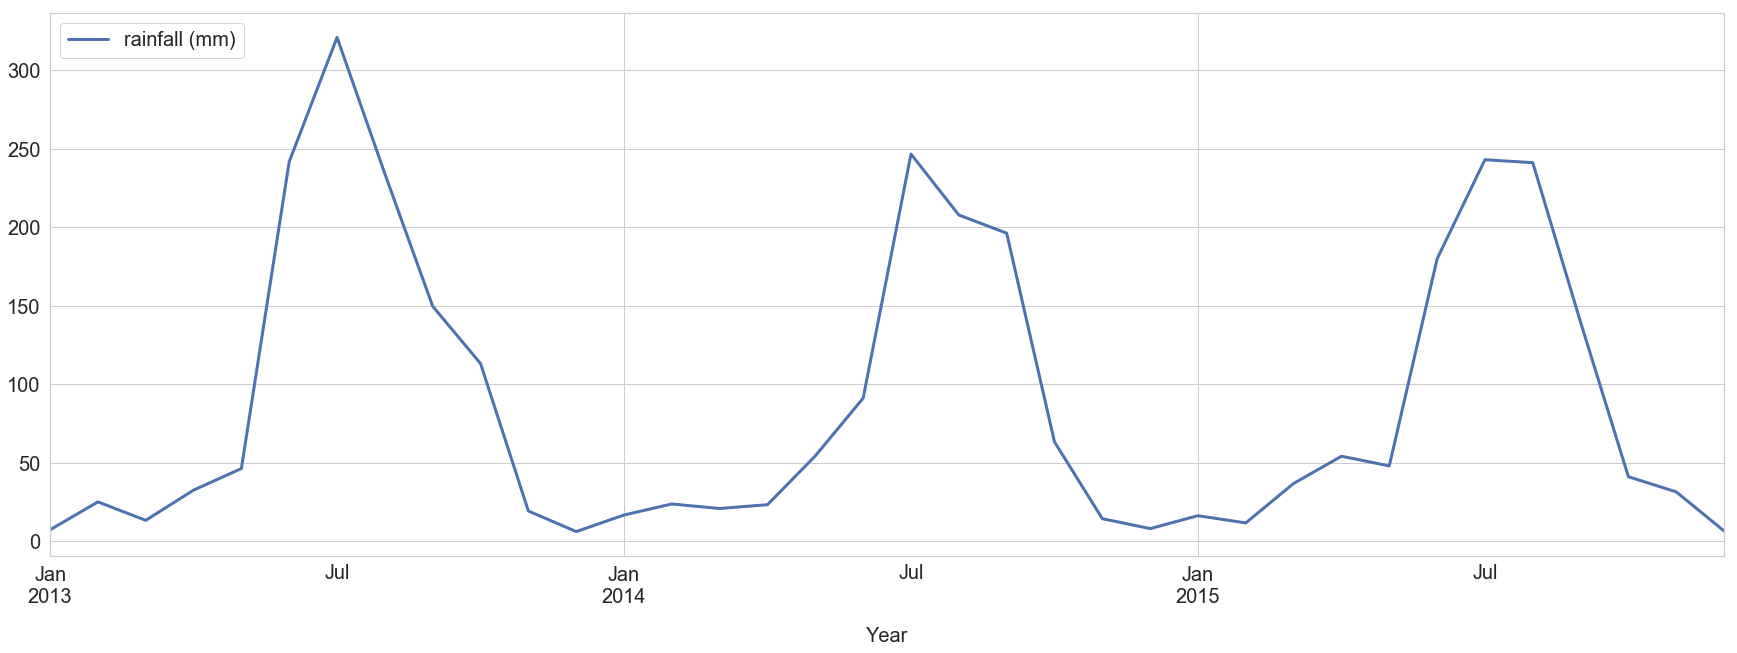

In [8]:
# plot data over time
df_india_rainfall.plot(figsize = (30, 10), linewidth = 3, fontsize = 20)
plt.legend(labels = ['rainfall (mm)'], loc = 'upper left', fontsize = 20)
plt.xlabel('Year', fontsize = 20, labelpad = 20);

In [9]:
# get gold data
start_date = '2013-01-01'
end_date = '2016-01-01'

gld_price = data.DataReader('GLD', 'yahoo', start_date, end_date)

In [10]:
gld_price.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-02,164.139999,163.139999,163.490005,163.169998,10431800,163.169998
2013-01-03,162.880005,160.830002,162.479996,161.199997,16117500,161.199997
2013-01-04,160.630005,158.889999,159.520004,160.440002,19179800,160.440002
2013-01-07,159.960007,159.149994,159.360001,159.429993,9361800,159.429993
2013-01-08,160.990005,160.009995,160.460007,160.559998,7694800,160.559998


In [11]:
gld_price.max()

High         1.644000e+02
Low          1.633700e+02
Open         1.639500e+02
Close        1.636700e+02
Volume       9.380420e+07
Adj Close    1.636700e+02
dtype: float64

In [12]:
gld_price.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2013-01-02 to 2015-12-31
Data columns (total 6 columns):
High         756 non-null float64
Low          756 non-null float64
Open         756 non-null float64
Close        756 non-null float64
Volume       756 non-null int64
Adj Close    756 non-null float64
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [13]:
gld_monthly = gld_price.resample('MS').mean()

In [14]:
gld_monthly.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2013-01-01,162.323809,161.199523,161.810952,161.673332,1.059382e+07,161.673332
2013-02-01,158.356843,156.835262,157.753159,157.602632,1.271941e+07,157.602632
2013-03-01,154.614001,153.608498,154.011001,154.133501,8.030755e+06,154.133501
2013-04-01,144.874547,142.805000,144.211363,143.622272,2.065790e+07,143.622272
2013-05-01,138.025001,136.056817,136.985454,136.990909,1.267180e+07,136.990909


In [15]:
df_gld_price = pd.DataFrame(gld_monthly['Adj Close'])

In [16]:
df_gld_price.head()

,Adj Close
Date,
2013-01-01,161.673332
2013-02-01,157.602632
2013-03-01,154.133501
2013-04-01,143.622272
2013-05-01,136.990909


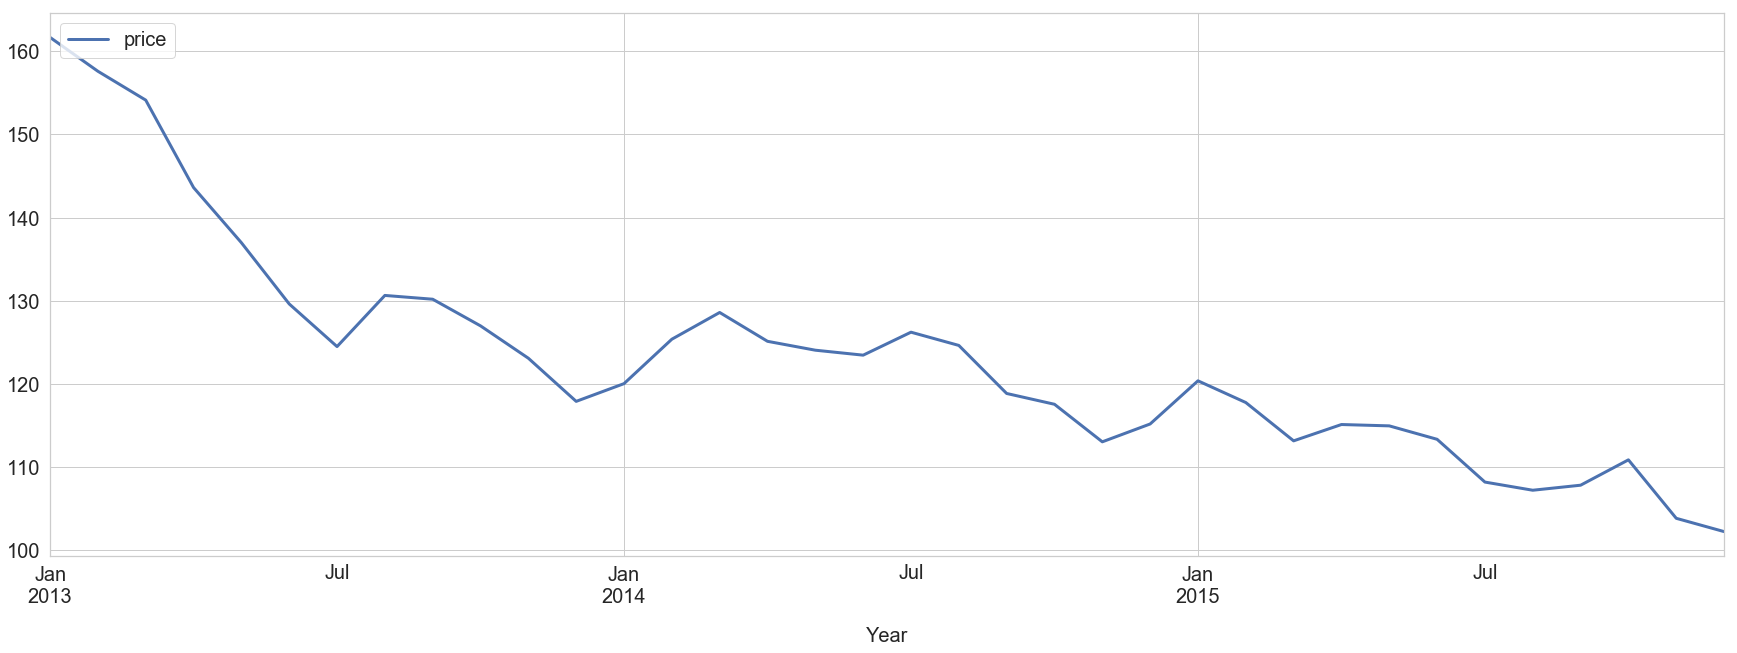

In [17]:
# plot gld price over time
df_gld_price.plot(figsize = (30, 10), linewidth = 3, fontsize = 20)
plt.legend(labels = ['price'], loc = 'upper left', fontsize = 20)
plt.xlabel('Year', fontsize = 20, labelpad = 20);

<Figure size 720x576 with 0 Axes>

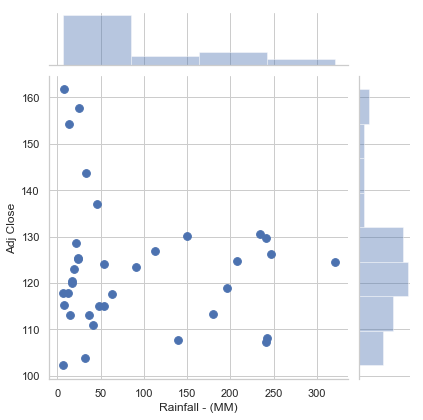

In [18]:
plt.figure(figsize = (10, 8))
sns.jointplot(x = df_india_rainfall['Rainfall - (MM)'], y = df_gld_price['Adj Close'], s = 60)

In [19]:
rain = df_india_rainfall['Rainfall - (MM)']
gld =  df_gld_price['Adj Close']

In [20]:
# check overall correlation
np.corrcoef(rain, gld)

array([[ 1.        , -0.13258102],
       [-0.13258102,  1.        ]])

In [21]:
# check rolling 
df_rolling_corr = pd.DataFrame(rain.rolling(3).corr(gld))

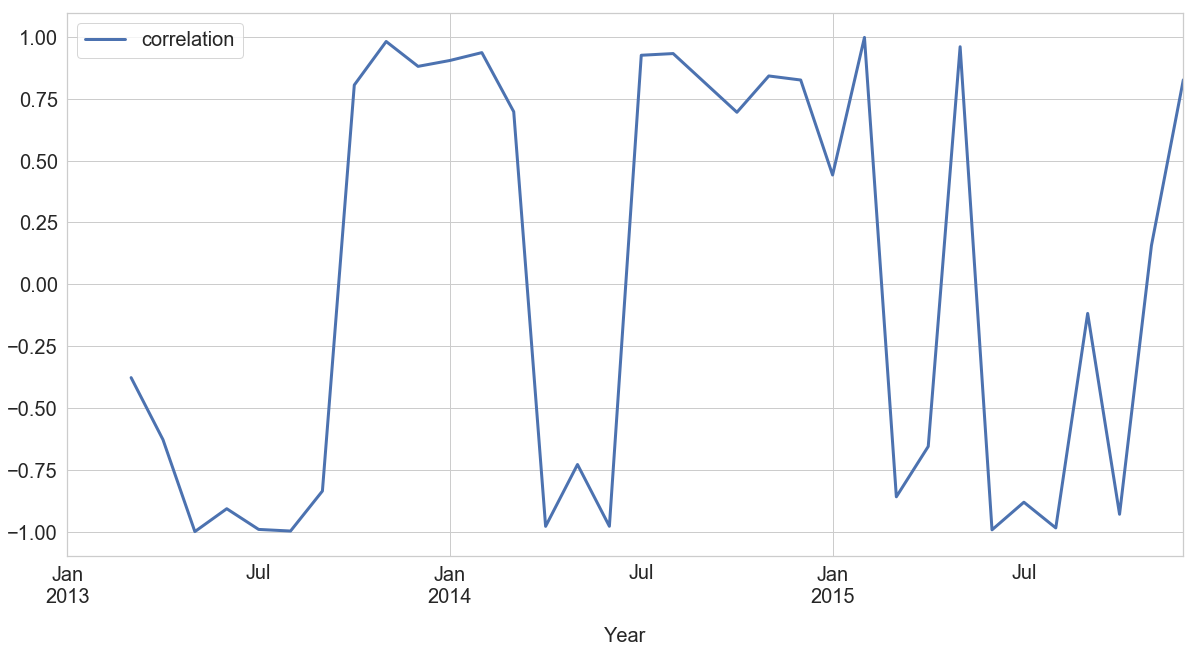

In [22]:
# plot 6 month rolling correlation
df_rolling_corr.plot(figsize = (20, 10), linewidth = 3, fontsize = 20)
plt.legend(labels = ['correlation'], loc = 'upper left', fontsize = 20)
plt.xlabel('Year', fontsize = 20, labelpad = 20);

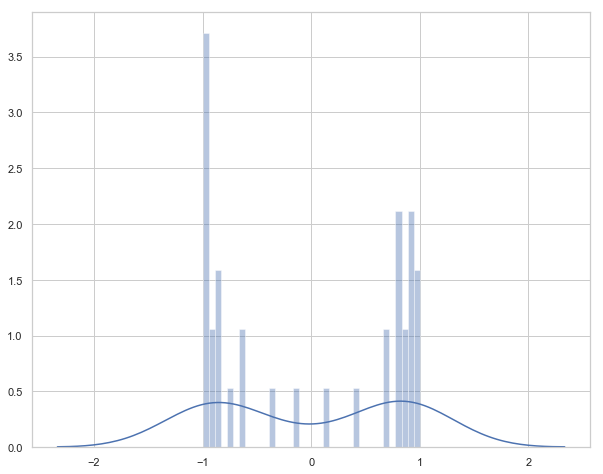

In [23]:
plt.figure(figsize = (10, 8))
sns.distplot(df_rolling_corr.dropna(), bins = len(df_rolling_corr))

### Summary:
The point estimate showed a negative correlation of ~ 0.1 between the price of gold and rainfall in India. Further exploration of a 3 month rolling correlation revealed a non-normal distribution of correlations with widely varying oscillations in the correlation values over time. There is no signal found in the relationship between GLD and India's rainfall.